In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df=pd.read_csv('D:/EDA-Collection/student performance/data/StudentPerformanceFactors.csv')

In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
df.shape

(6607, 20)

In [6]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [7]:
df.isnull().sum() # to check null value

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

in our dataset we have null value in Teacher_Quality, Parental_Education_Level and Distance_from_Home.

In [8]:
df.dropna(inplace=True)

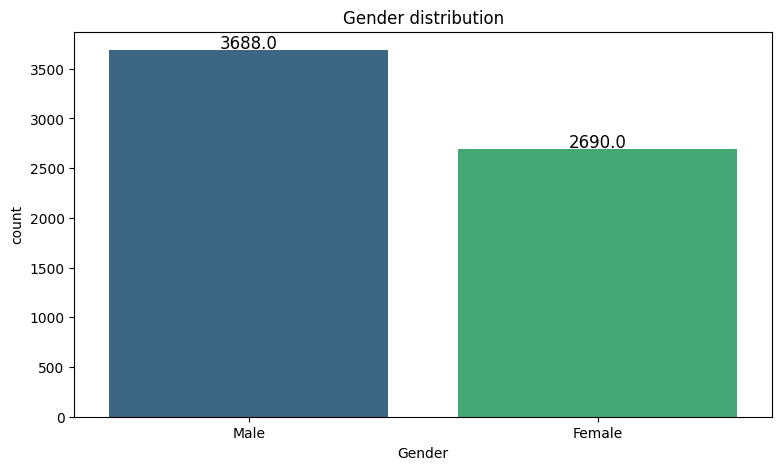

In [9]:
plt.figure(figsize=(9, 5))
ax=sns.countplot(x='Gender',data=df,palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')
plt.title('Gender distribution')
plt.show()

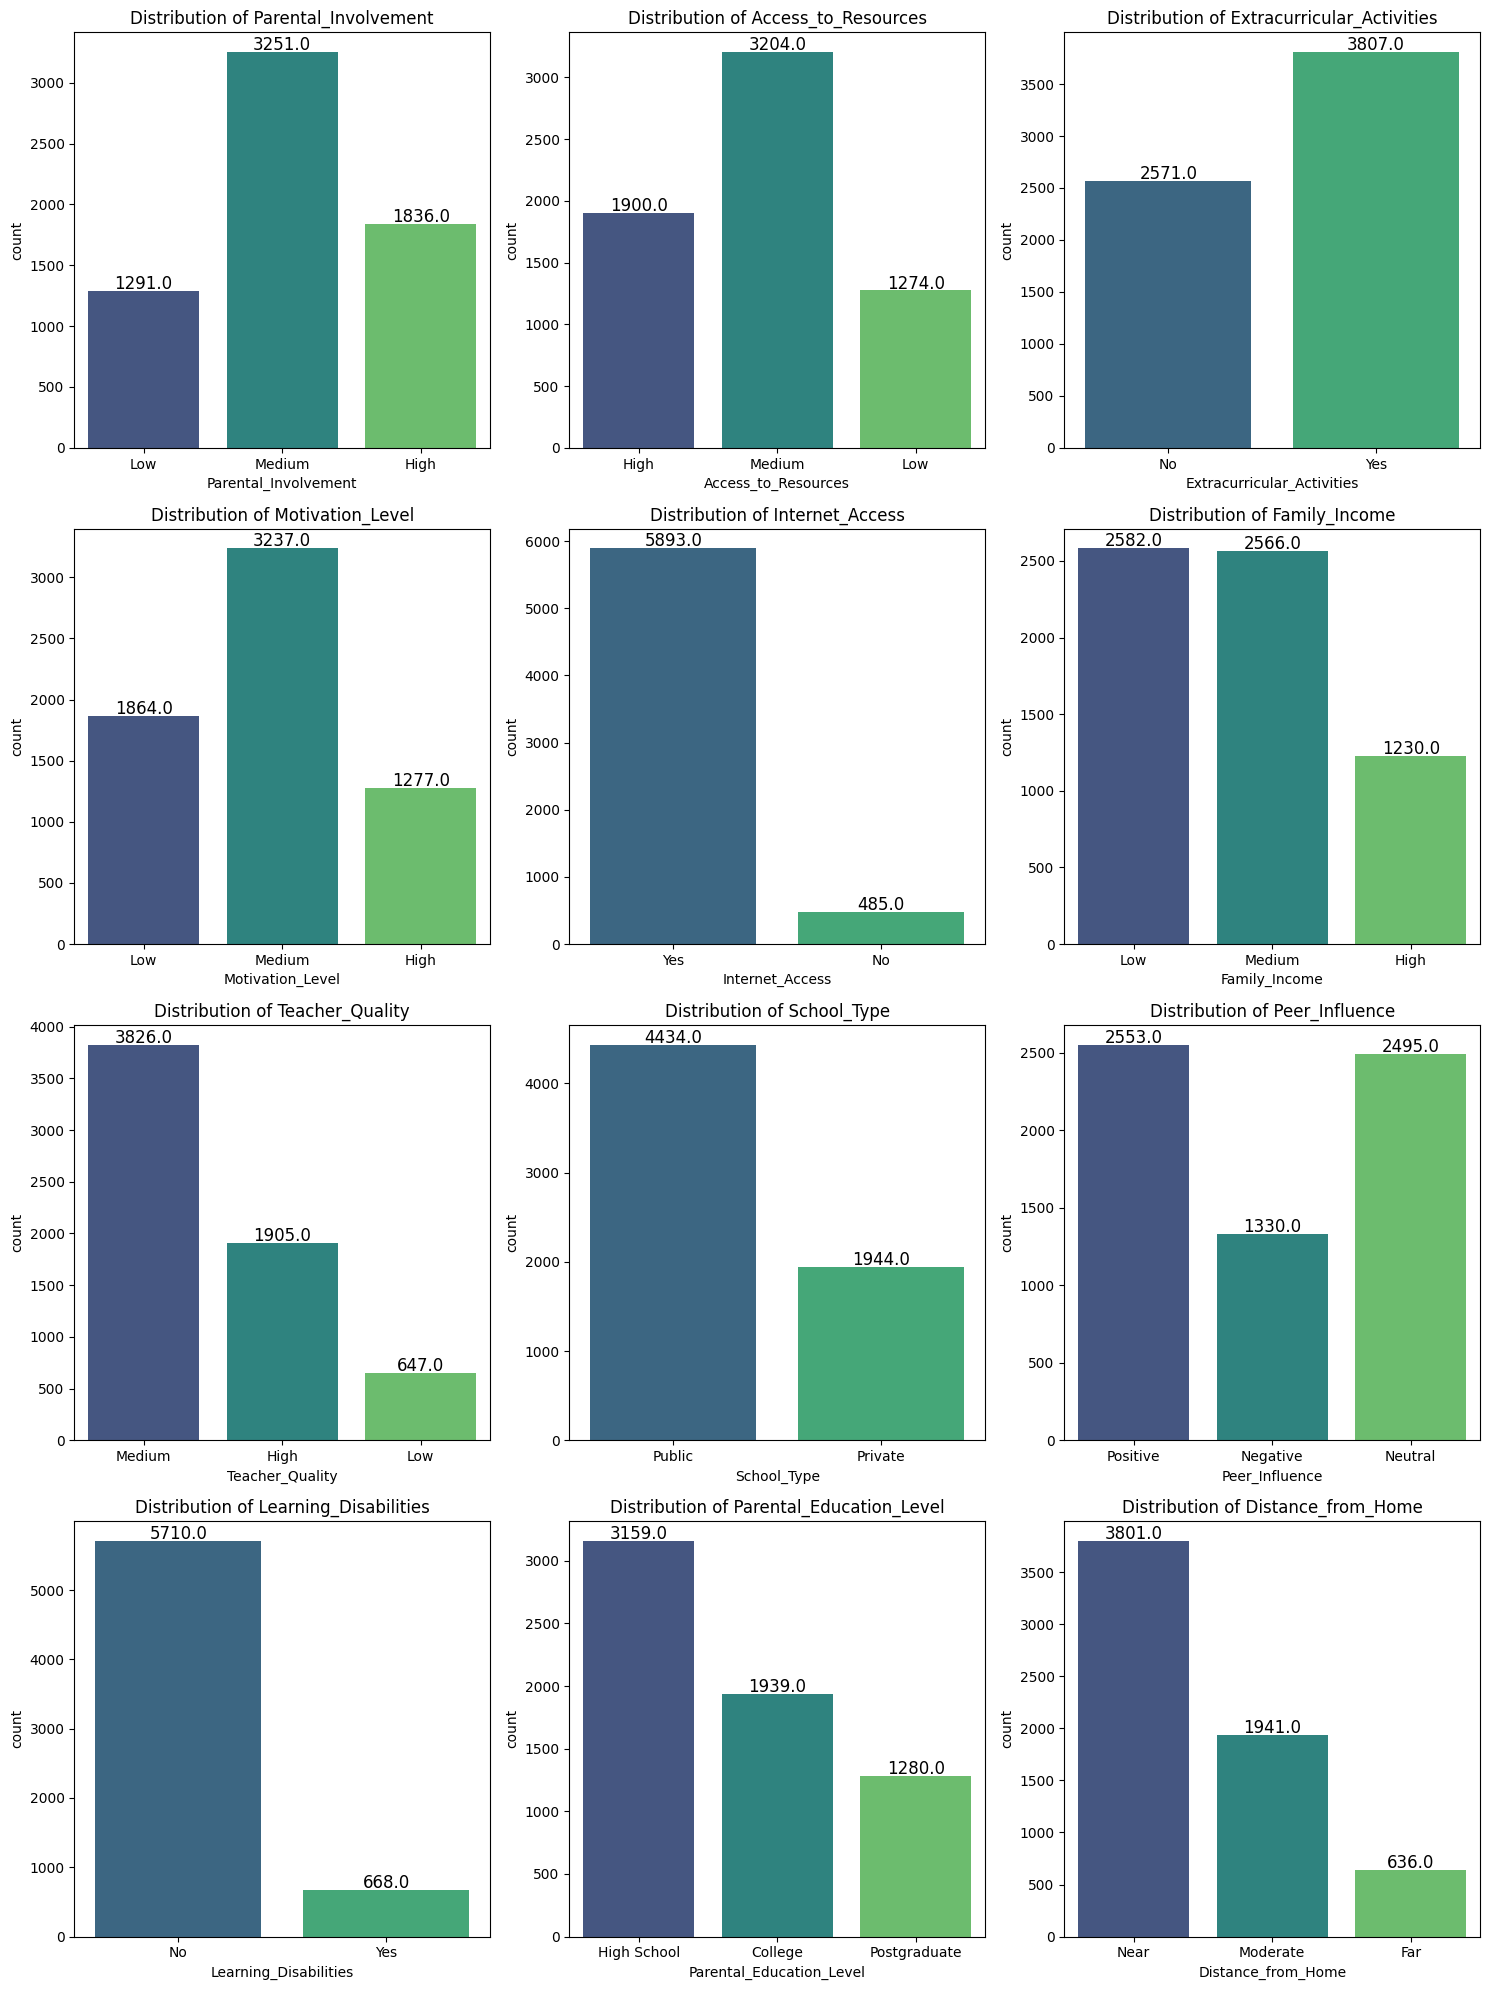

In [10]:
# Get the list of object (string) columns excluding 'Gender'
object_columns = [col for col in df.select_dtypes(include=['object']).columns if col != 'Gender']

# Determine the number of subplots needed
n = len(object_columns)
ncols = 3  # Number of columns in the subplot grid
nrows = (n + ncols - 1) // ncols  # Calculate the number of rows needed

# Create a figure with subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each count plot in a subplot
for idx, col in enumerate(object_columns):
    sns.countplot(x=col, data=df, palette='viridis', ax=axes[idx])
    # Add counts on top of each bar
    for p in axes[idx].patches:
        height = p.get_height()
        axes[idx].annotate(f'{height}', 
                            (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', 
                            fontsize=12, color='black', 
                            xytext=(0, 5), textcoords='offset points')
    axes[idx].set_title(f'Distribution of {col}')

# Remove any unused subplots
for ax in axes[len(object_columns):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


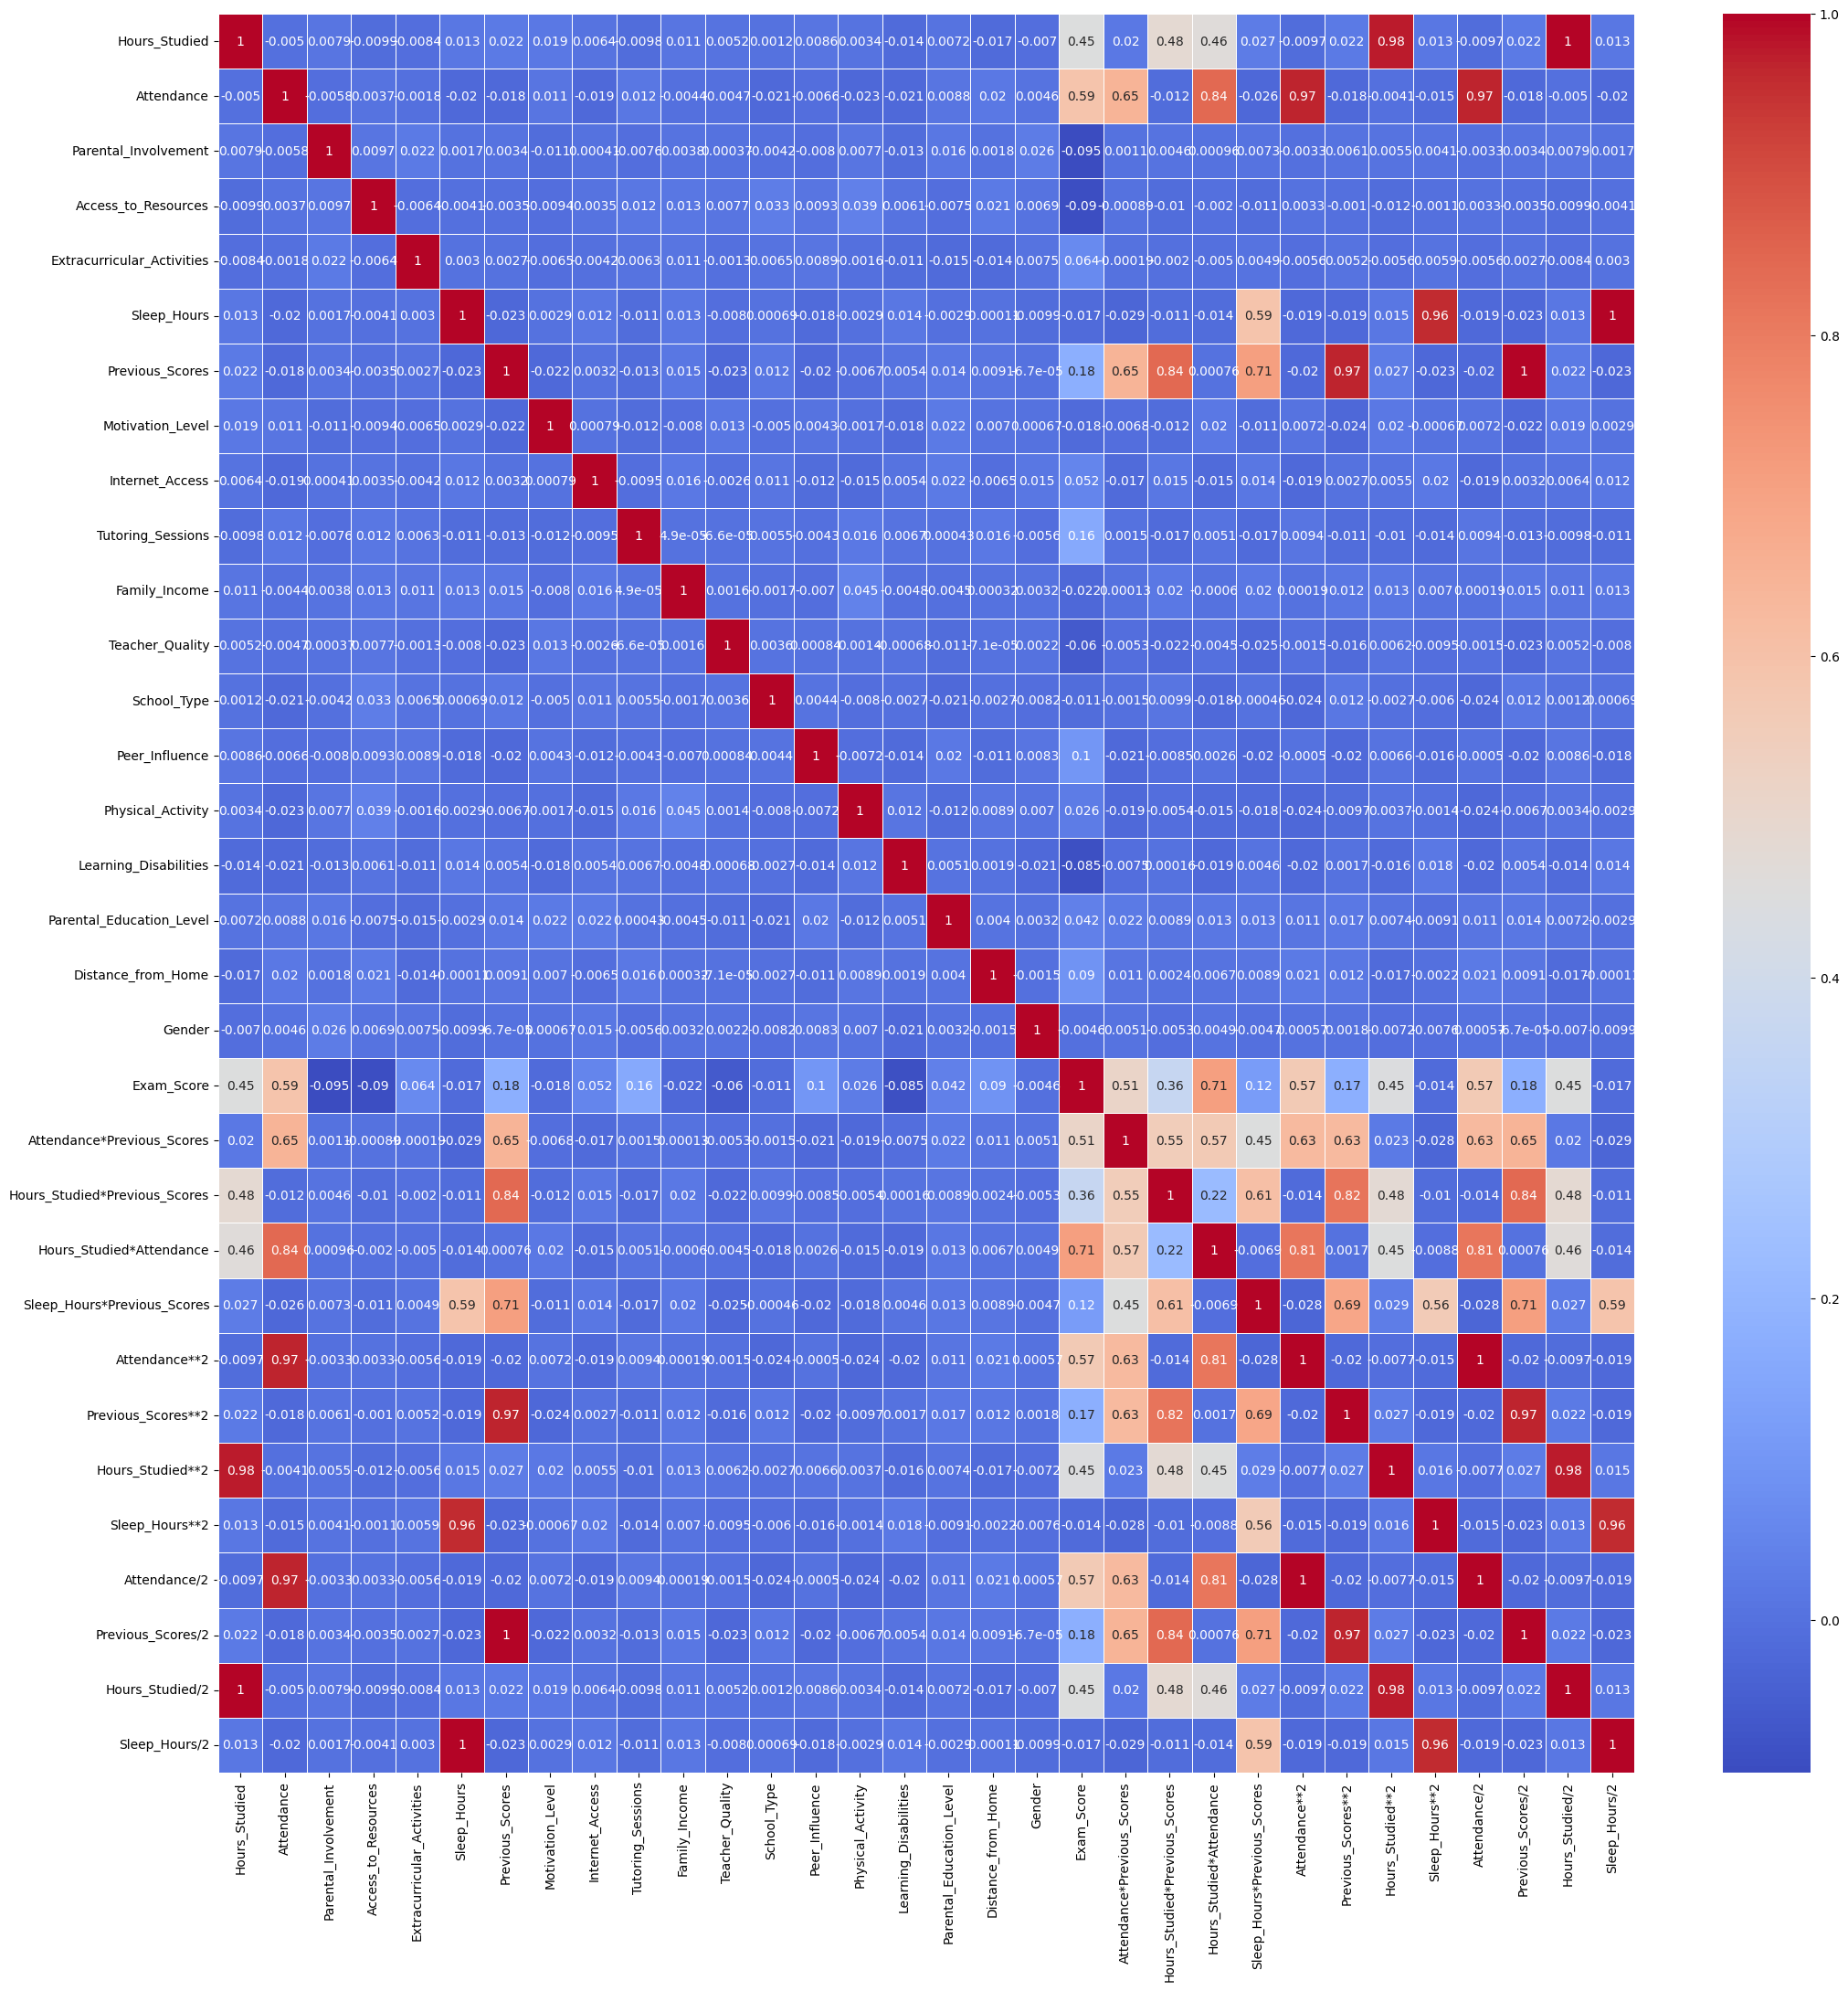

In [30]:
plt.figure(figsize=(25, 25))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [11]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [12]:
df['Attendance*Previous_Scores']=df['Attendance'].values*df['Previous_Scores'].values
df['Hours_Studied*Previous_Scores']=df['Hours_Studied'].values*df['Previous_Scores'].values
df['Hours_Studied*Attendance']=df['Hours_Studied'].values*df['Attendance'].values
df['Sleep_Hours*Previous_Scores']=df['Sleep_Hours'].values*df['Previous_Scores'].values
df['Attendance*Previous_Scores']=df['Attendance'].values*df['Previous_Scores'].values


df['Attendance**2']=df['Attendance']**2
df['Previous_Scores**2']=df['Previous_Scores']**2
df['Hours_Studied**2']=df['Hours_Studied']**2
df['Sleep_Hours**2']=df['Sleep_Hours']**2

df['Attendance/2']=df['Attendance']**2
df['Previous_Scores/2']=df['Previous_Scores']/2
df['Hours_Studied/2']=df['Hours_Studied']/2
df['Sleep_Hours/2']=df['Sleep_Hours']/2

df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Hours_Studied*Attendance,Sleep_Hours*Previous_Scores,Attendance**2,Previous_Scores**2,Hours_Studied**2,Sleep_Hours**2,Attendance/2,Previous_Scores/2,Hours_Studied/2,Sleep_Hours/2
0,22,24,1,0,0,3,23,1,1,0,...,528,69,576,529,484,9,576,11.5,11.0,1.5
1,18,4,1,2,0,4,9,1,1,2,...,72,36,16,81,324,16,16,4.5,9.0,2.0
2,23,38,2,2,1,3,41,2,1,2,...,874,123,1444,1681,529,9,1444,20.5,11.5,1.5
3,28,29,1,2,1,4,48,2,1,1,...,812,192,841,2304,784,16,841,24.0,14.0,2.0
4,18,32,2,2,1,2,15,2,1,3,...,576,30,1024,225,324,4,1024,7.5,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,24,9,0,2,0,3,26,2,1,1,...,216,78,81,676,576,9,81,13.0,12.0,1.5
6603,22,16,0,2,0,4,31,2,1,3,...,352,124,256,961,484,16,256,15.5,11.0,2.0
6604,19,30,2,1,1,2,15,1,1,3,...,570,30,900,225,361,4,900,7.5,9.5,1.0
6605,9,26,0,0,1,2,41,0,1,2,...,234,82,676,1681,81,4,676,20.5,4.5,1.0


In [13]:
df['Exam_Score'].head()

0    12
1     6
2    19
3    16
4    15
Name: Exam_Score, dtype: int64

In [14]:
x=df.drop('Exam_Score',axis=1)
y=df['Exam_Score']

Best Hyperparameters:

Model: Decision Tree
Mean Absolute Error: 1.5938
Mean Squared Error: 7.1226
R^2 Score: 0.5274

Model: Random Forest Regressor
Mean Absolute Error: 1.2019
Mean Squared Error: 5.2281
R^2 Score: 0.6531

Model: XGBoost Regressor
Mean Absolute Error: 0.7918
Mean Squared Error: 4.3160
R^2 Score: 0.7136

Model: Ridge
Mean Absolute Error: 1.0598
Mean Squared Error: 4.7724
R^2 Score: 0.6833

Best Model: XGBoost Regressor
Best Score: 0.7136


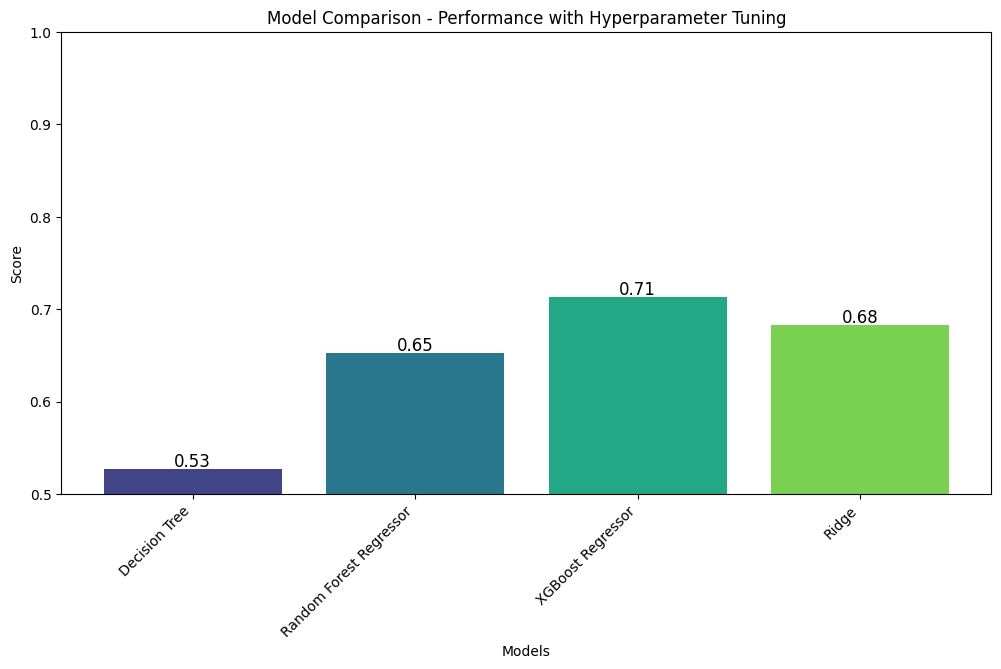

In [15]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.metrics import recall_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from joblib import parallel_backend

# Assuming you have a classification problem; if not, adjust metrics accordingly

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the hyperparameter grids for each model
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

param_grid_logistic = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

param_grid_dt = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf_regressor = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

param_grid_ridge = {
    'alpha': [0.1, 1, 10, 100]
}

# Create the models with default hyperparameters
dt_model = DecisionTreeRegressor(random_state=42)
rf_model_regressor = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)
ridge_model = Ridge(random_state=42)

# Perform Randomized Search with cross-validation to find the best hyperparameters for each model
random_search_dt = RandomizedSearchCV(dt_model, param_grid_dt, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_rf_regressor = RandomizedSearchCV(rf_model_regressor, param_grid_rf_regressor, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_xgb = RandomizedSearchCV(xgb_model, param_grid_xgb, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_ridge = RandomizedSearchCV(ridge_model, param_grid_ridge, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Perform Randomized Search with cross-validation
with parallel_backend('threading'):
    random_search_dt.fit(X_train, y_train)
    random_search_rf_regressor.fit(X_train, y_train)
    random_search_xgb.fit(X_train, y_train)
    random_search_ridge.fit(X_train, y_train)

# Get the best hyperparameters and best models
best_params_dt = random_search_dt.best_params_
best_dt_model = random_search_dt.best_estimator_

best_params_rf_regressor = random_search_rf_regressor.best_params_
best_rf_regressor_model = random_search_rf_regressor.best_estimator_

best_params_xgb = random_search_xgb.best_params_
best_xgb_model = random_search_xgb.best_estimator_

best_params_ridge = random_search_ridge.best_params_
best_ridge_model = random_search_ridge.best_estimator_

# Evaluate the best models
best_models = {
    "Decision Tree": best_dt_model,
    "Random Forest Regressor": best_rf_regressor_model,
    "XGBoost Regressor": best_xgb_model,
    "Ridge": best_ridge_model
}

# Initialize variables to track the best model and score
best_model_name = None
best_score = 0
model_scores = {}

# Print the best hyperparameters for each model and evaluate
print("Best Hyperparameters:")
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_pred_class = model.predict(X_test)
        recall = recall_score(y_test, y_pred_class, average='weighted')
        model_scores[model_name] = recall
    else:
        # For regression models, use different metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        model_scores[model_name] = r2
        recall = None
    
    # Print the model performance
    print(f"\nModel: {model_name}")
    if recall is not None:
        print(f"Recall: {recall:.4f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred_class))
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred_class))
    else:
        print(f"Mean Absolute Error: {mae:.4f}")
        print(f"Mean Squared Error: {mse:.4f}")
        print(f"R^2 Score: {r2:.4f}")

# Determine the best model based on the highest score
best_model_name = max(model_scores, key=model_scores.get)
best_score = model_scores[best_model_name]

# Print the best model
print(f"\nBest Model: {best_model_name}")
print(f"Best Score: {best_score:.4f}")

plt.figure(figsize=(12, 6))

# Define the colors and plot the bar chart
colors = sns.color_palette('viridis', len(model_scores))
bars = plt.bar(model_scores.keys(), model_scores.values(), color=colors)

# Add annotations to each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', 
                 (bar.get_x() + bar.get_width() / 2., height), 
                 ha='center', va='center', 
                 fontsize=12, color='black', 
                 xytext=(0, 5), textcoords='offset points')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Comparison - Performance with Hyperparameter Tuning')
plt.ylim(0.5, 1.0)  # Adjust the y-axis limits as needed
plt.xticks(rotation=45, ha='right')
plt.show()